Ανάλυση των tweets του λογαριασμού του πρωθυπουργού, @PrimeministerGR.

In [2]:
import pandas as pd
import numpy as np 


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/2PrimeministerTweets090522.tsv", sep='\t')

In [5]:
full_tweets_df.head()

Unnamed: 0  ... quoted_status
0           0  ...           NaN
1           1  ...           NaN
2           2  ...           NaN
3           3  ...           NaN
4           4  ...           NaN

[5 rows x 32 columns]

Φτιάχνουμε ένα μικρότερο dataframe

In [6]:
short_tweets = full_tweets_df[['created_at','full_text' ]]


In [7]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [8]:
short_tweets.head(400)

date                                               text
0    Sat Jul 03 10:07:37 +0000 2021  Τέθηκε σε λειτουργία η ηλεκτρική διασύνδεση τη...
1    Fri Jul 02 13:26:18 +0000 2021  Ο ΟΟΣΑ οφείλει να πρωταγωνιστήσει στη νέα κοιν...
2    Fri Jul 02 13:24:57 +0000 2021  Ένα μεγάλο βήμα μπροστά είναι η συμφωνία για μ...
3    Fri Jul 02 13:23:26 +0000 2021  Όπως συζητήσαμε με τον @MathiasCormann, η παγκ...
4    Fri Jul 02 13:22:29 +0000 2021  I was happy to welcome Secretary-General of th...
..                              ...                                                ...
395  Mon Mar 29 13:03:11 +0000 2021  Είναι ευκαιρία να οδηγήσουμε την ελληνική οικο...
396  Mon Mar 29 13:03:09 +0000 2021  Το Εθνικό Σχέδιο Ανάκαμψης είναι ένα γιγαντιαί...
397  Sun Mar 28 20:54:12 +0000 2021  Η ελληνοκαναδική κοινότητα είναι πάντα εκεί γι...
398  Sun Mar 28 20:54:09 +0000 2021  Με μεγάλη χαρά συμμετείχα μαζί με τον Πρωθυπου...
399  Sun Mar 28 18:14:25 +0000 2021  Live | Στην επετειακή εκδήλωση για τη συμπλήρω...

[400 rows x 2 columns]

Βλέπω ποια tweets περιέχουν τη λέξη "εμβ[α-ωά-ώ]*" , ώστε να αναλύσω αυτά αργότερα.

In [9]:
short_tweets[short_tweets.text.str.contains('εμβ[α-ωά-ώ]*')]

date                                               text
3     Fri Jul 02 13:23:26 +0000 2021  Όπως συζητήσαμε με τον @MathiasCormann, η παγκ...
15    Wed Jun 30 11:59:25 +0000 2021  Ευχαρίστησα τον Αρχιεπίσκοπο Αθηνών και Πάσης ...
25    Mon Jun 28 09:33:33 +0000 2021  Οι νέοι 18-25 ετών με την 1η δόση του εμβολίου...
26    Mon Jun 28 09:05:45 +0000 2021  Live | Παρουσίαση μέτρων για την ενθάρρυνση τω...
31    Fri Jun 25 13:19:14 +0000 2021  Συζητήσαμε για τη μετάλλαξη Δέλτα. Σύμφωνα με ...
...                              ...                                                ...
2815  Wed Nov 07 18:34:49 +0000 2018  Προχωράμε δια νόμου, στην απόδοση 820 εκατομμυ...
2853  Fri Oct 19 12:06:18 +0000 2018  Η εμβάθυνση της Ευρωζώνης πρέπει να προχωρήσει...
2935  Tue Sep 11 10:44:19 +0000 2018  Καταφέραμε να εμβαθύνουμε τις δομικές μεταρρυθ...
3022  Sat Sep 01 11:54:54 +0000 2018  Η Αλίκη Γιωτοπούλου-Μαραγκοπούλου έφυγε από τη...
3061  Fri Aug 10 14:38:10 +0000 2018  Χρέος μας είναι να συνεχίσουμε αποφασιστικά, μ...

[220 rows x 2 columns]

In [10]:
short_tweets.tail()

date                                               text
3245  Fri Jun 15 18:55:05 +0000 2018  Μέσα από μια πολυδιάστατη, ενεργητική εξωτερικ...
3246  Fri Jun 15 18:50:05 +0000 2018  Ομιλία στο συνέδριο του Economist με θέμα «A C...
3247  Thu Jun 14 12:30:29 +0000 2018  Η πρόταση δυσπιστίας που κατέθεσε σήμερα η αντ...
3248  Thu Jun 14 12:30:29 +0000 2018  Ο κ. Μητσοτάκης επέλεξε να μετατραπεί σε ένα θ...
3249  Thu Jun 14 12:30:28 +0000 2018  Η σημερινή συνεδρίαση της Βουλής έχει ιστορικό...

In [11]:
short_tweets.dtypes

date    object
text    object
dtype: object

Μετατρέπω το string της ημερομηνίας σε datetime 

In [12]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')


In [13]:
short_tweets.dtypes

date    datetime64[ns]
text            object
dtype: object

In [14]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day


In [15]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

Πόσα tweets κάνει τον μήνα

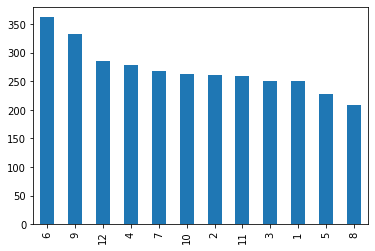

In [16]:
short_tweets['month'].value_counts().plot(kind='bar')

Tweets με τη λέξη 'εμβ[α-ωά-ώ]*' ανά μήνα

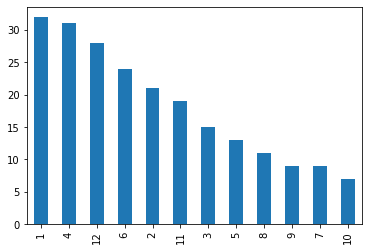

In [17]:
short_tweets[short_tweets.text.str.contains('εμβ[α-ωά-ώ]*')]['month'].value_counts().plot(kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


Φτιάχνω μια μεταβλητή που περιέχει τα tweets που περιέχουν την λέξη "εμβ[α-ωά-ώ]*"

In [ ]:
text = short_tweets[short_tweets.text.str.contains('εμβ[α-ωά-ώ]*')] ['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
text

'Όπως συζητήσαμε με τον @MathiasCormann, η παγκόσμια ανάκαμψη οφείλει να συνδυαστεί με τον περιορισμό των ανισοτήτων, την αύξηση της διεθνούς αλληλεγγύης με πρώτο στόχο τον παγκόσμιο εμβολιασμό, την τόνωση της εργασίας σε όλες τις χώρες και την αντιμετώπιση της κλιματικής αλλαγής.   Ευχαρίστησα τον Αρχιεπίσκοπο Αθηνών και Πάσης Ελλάδος κ. Ιερώνυμο για την συμβολή του ώστε να πειστούν οι συμπολίτες μας, ειδικά οι πιο ηλικιωμένοι, να εμβολιαστούν. Του ζήτησα να συνεχιστεί αυτή η προσπάθεια. Ο εμβολιασμός είναι πράξη αυτοπροστασίας αλλά και αλληλεγγύης.   Οι νέοι 18-25 ετών με την 1η δόση του εμβολίου, αποκτούν μια προπληρωμένη κάρτα €150 για χρήση σε τουριστικές και πολιτιστικές δραστηριότητες. Είναι ένα ευχαριστώ για την υπομονή και επιμονή τους, αλλά και ένα κίνητρο για να εμβολιαστούν. #freedom_pass   Live | Παρουσίαση μέτρων για την ενθάρρυνση των εμβολιασμών.   Συζητήσαμε για τη μετάλλαξη Δέλτα. Σύμφωνα με τις εκτιμήσεις του ECDC, μέχρι τα τέλη Αυγούστου θα είναι η επικρατούσα σε όλ

Αφαιρώ τα κενά μεταξύ των tweets

In [ ]:
short_tweets[short_tweets.text.str.contains('εμβ[α-ωά-ώ]*')] ['text'].str.cat(sep = ' ').replace("amp", ' ')


'Όπως συζητήσαμε με τον @MathiasCormann, η παγκόσμια ανάκαμψη οφείλει να συνδυαστεί με τον περιορισμό των ανισοτήτων, την αύξηση της διεθνούς αλληλεγγύης με πρώτο στόχο τον παγκόσμιο εμβολιασμό, την τόνωση της εργασίας σε όλες τις χώρες και την αντιμετώπιση της κλιματικής αλλαγής.   Ευχαρίστησα τον Αρχιεπίσκοπο Αθηνών και Πάσης Ελλάδος κ. Ιερώνυμο για την συμβολή του ώστε να πειστούν οι συμπολίτες μας, ειδικά οι πιο ηλικιωμένοι, να εμβολιαστούν. Του ζήτησα να συνεχιστεί αυτή η προσπάθεια. Ο εμβολιασμός είναι πράξη αυτοπροστασίας αλλά και αλληλεγγύης.   Οι νέοι 18-25 ετών με την 1η δόση του εμβολίου, αποκτούν μια προπληρωμένη κάρτα €150 για χρήση σε τουριστικές και πολιτιστικές δραστηριότητες. Είναι ένα ευχαριστώ για την υπομονή και επιμονή τους, αλλά και ένα κίνητρο για να εμβολιαστούν. #freedom_pass   Live | Παρουσίαση μέτρων για την ενθάρρυνση των εμβολιασμών.   Συζητήσαμε για τη μετάλλαξη Δέλτα. Σύμφωνα με τις εκτιμήσεις του ECDC, μέχρι τα τέλη Αυγούστου θα είναι η επικρατούσα σε όλ

Λίστα με αγγλικές stopwords

In [ ]:
list(STOPWORDS)[0:20]

['up',
 'against',
 'such',
 'all',
 "haven't",
 'if',
 'had',
 "i'll",
 'only',
 'more',
 'in',
 'to',
 'or',
 'has',
 'again',
 'during',
 'other',
 'can',
 "shan't",
 "i've"]

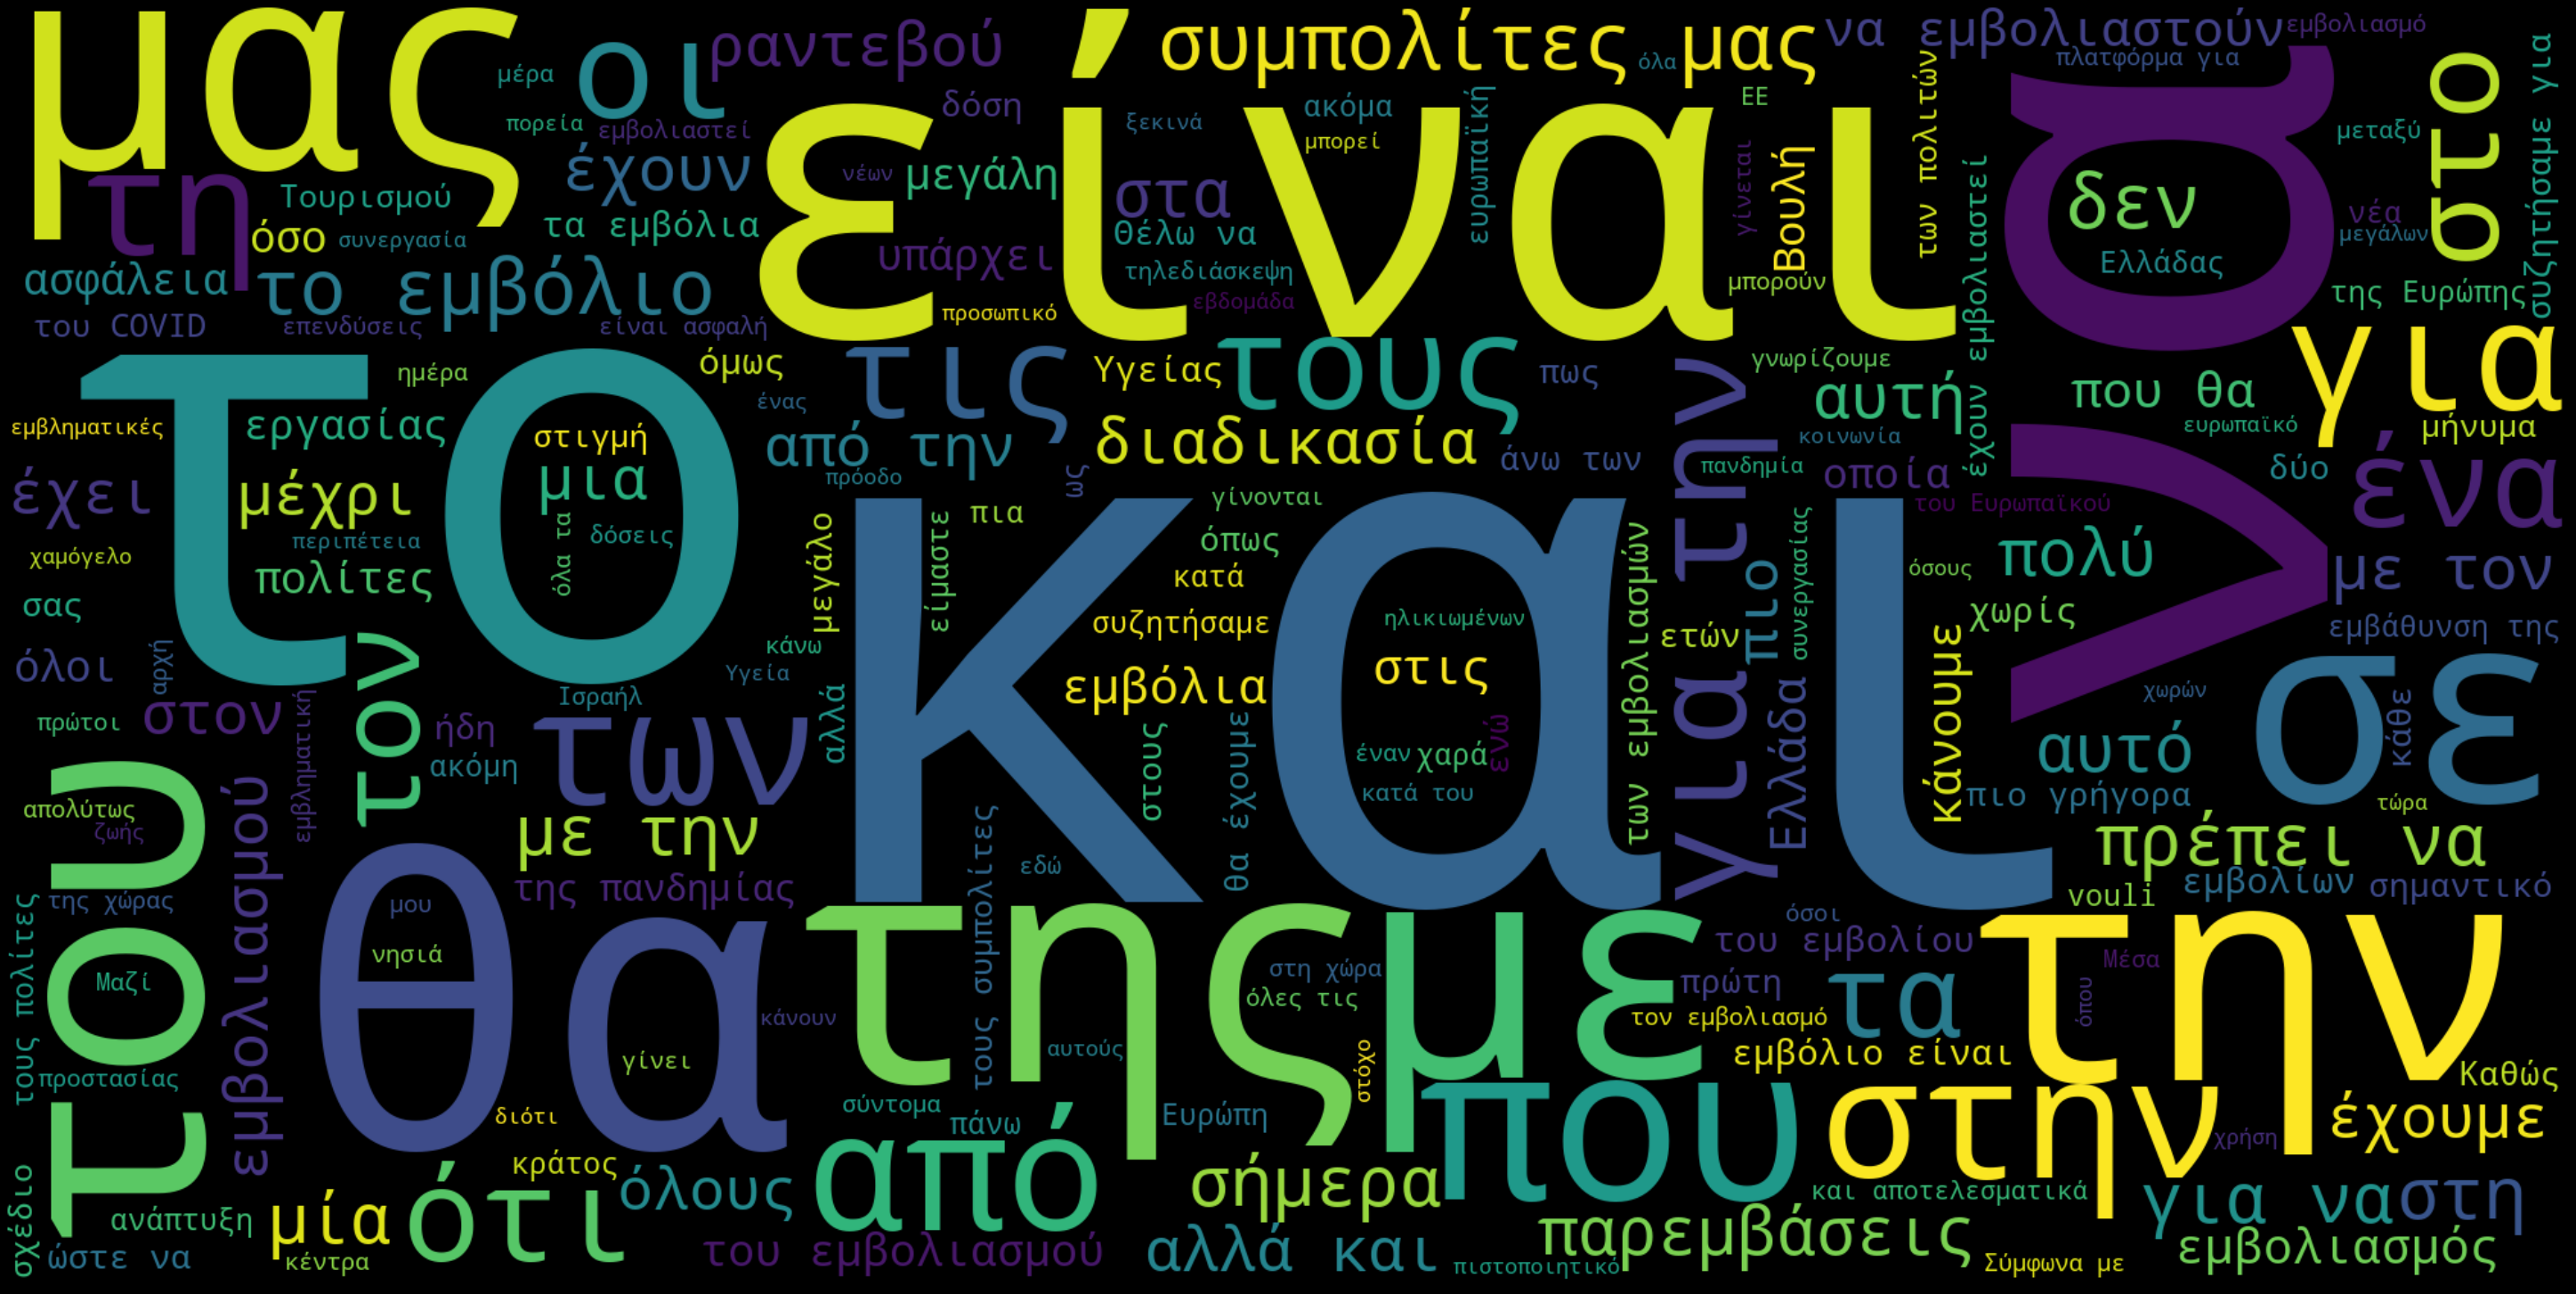

In [ ]:
wordcloud = WordCloud(
  stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

 Ελληνικά stopwords

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm



✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp=spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:30]

['πως',
 'αρχικά',
 'ιιι',
 'πού',
 'ευθύς',
 'όπως',
 'ετούτους',
 'οσηνδήποτε',
 'ταύτων',
 'υπόψιν',
 'τίποτα',
 'ήσαστε',
 'ολότελα',
 'τελευταίος',
 'οποίαν',
 'στην',
 'μόνους',
 'όλων',
 'μόνο',
 'επιπλέον',
 'μεμιάς',
 'ταύτης',
 'ίδιους',
 'πότε',
 'δικούς',
 'λιγάκι',
 'οσησδήποτε',
 'ενώ',
 'αλλοιώς',
 'απ']

Φτιάχνω ένα wordcloud

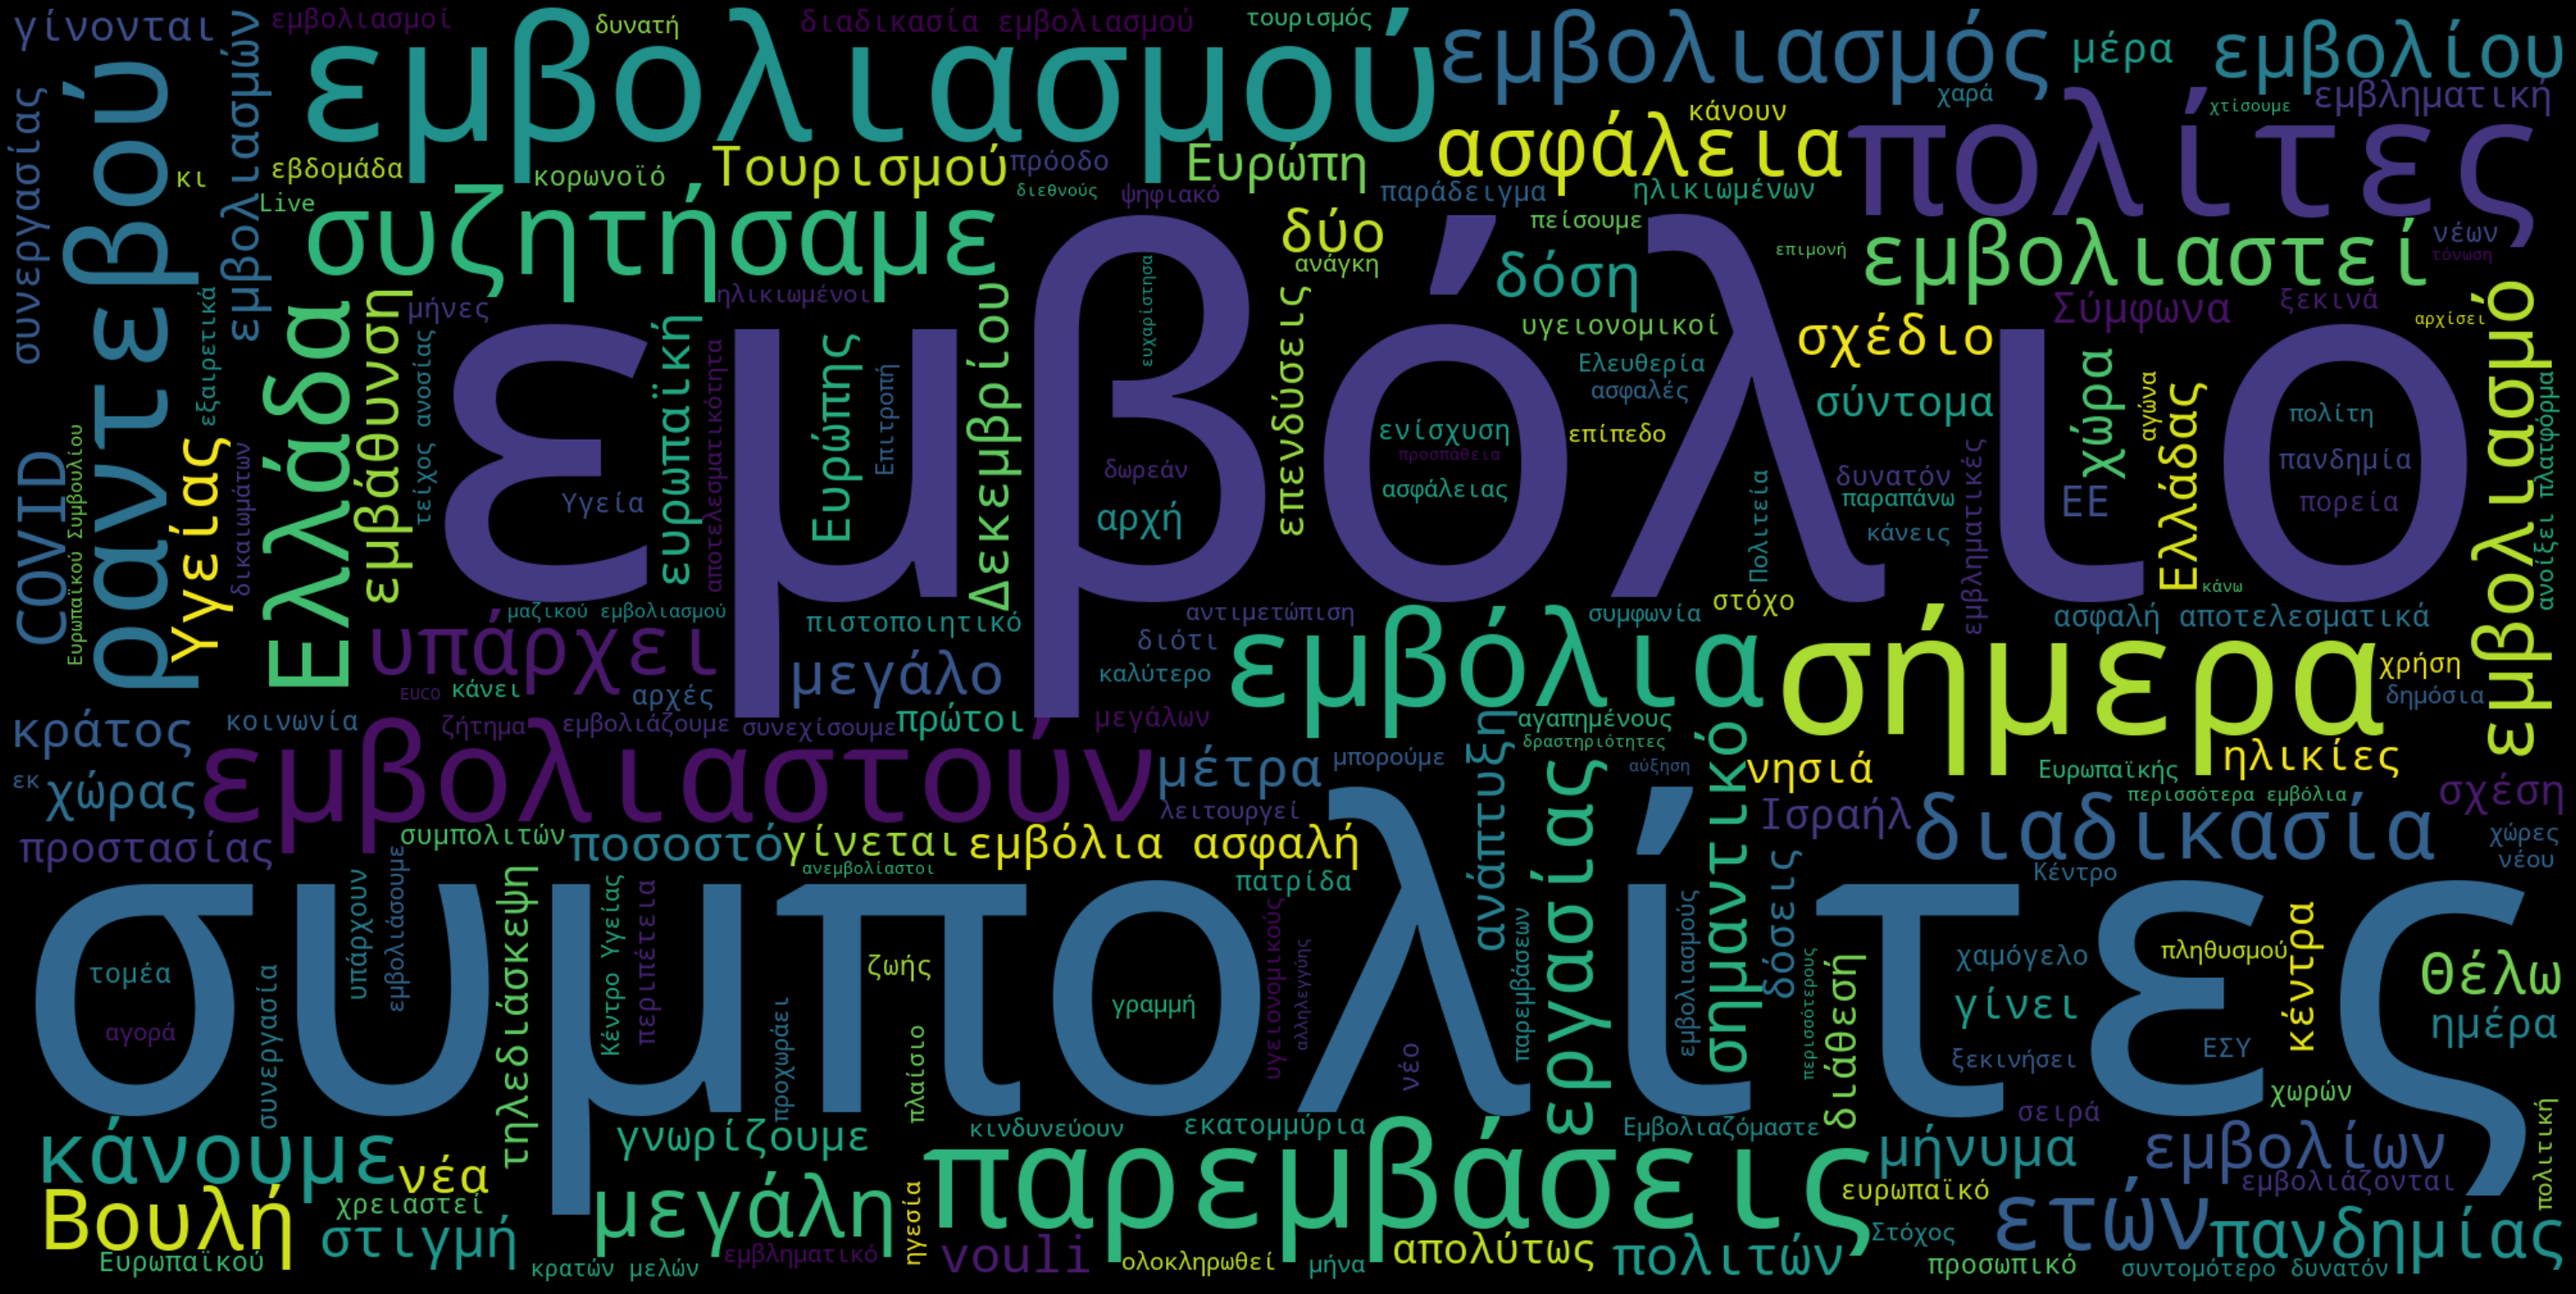

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Μετατροπή λέξεων στην ονομαστική, και των ρημάτων στο 1ο πρόσωπο

In [ ]:
doc = nlp(short_tweets['text'][1])

Lemmatization

In [ ]:
for token in doc:
    print(token, token.lemma_)

Ο ο
ΟΟΣΑ οοσας
οφείλει οφείλω
να να
πρωταγωνιστήσει πρωταγωνιστήσω
στη στη
νέα νέος
κοινωνική κοινωνική
και και
οικονομική οικονομικός
ανοικοδόμηση ανοικοδόμηση
μετά μετά
την την
πανδημία πανδημία
. .
Σε σε
αυτές αυτές
τις τις
συνθήκες συνθήκε
γίνεται γίνομαι
επίκαιρη επίκαιρη
η η
πρότασή πρότασή
μας μας
για για
την την
ίδρυση ίδρυση
ενός ενός
Κέντρου κέντρο
του του
ΟΟΣΑ οοσας
στην στην
Κρήτη Κρήτη
, ,
με με
αντικείμενο αντικείμενο
την την
αλληλεπίδραση αλληλεπίδραση
των των
οικονομικών οικονομικός
και και
δημογραφικών δημογραφικός
εξελίξεων εξελίξεο
. .
   


In [ ]:
' '.join(token.lemma_ for token in doc)

'ο οοσας οφείλω να πρωταγωνιστήσω στη νέος κοινωνική και οικονομικός ανοικοδόμηση μετά την πανδημία . σε αυτές τις συνθήκε γίνομαι επίκαιρη η πρότασή μας για την ίδρυση ενός κέντρο του οοσας στην Κρήτη , με αντικείμενο την αλληλεπίδραση των οικονομικός και δημογραφικός εξελίξεο .  '

In [ ]:
text

'Όπως συζητήσαμε με τον @MathiasCormann, η παγκόσμια ανάκαμψη οφείλει να συνδυαστεί με τον περιορισμό των ανισοτήτων, την αύξηση της διεθνούς αλληλεγγύης με πρώτο στόχο τον παγκόσμιο εμβολιασμό, την τόνωση της εργασίας σε όλες τις χώρες και την αντιμετώπιση της κλιματικής αλλαγής.   Ευχαρίστησα τον Αρχιεπίσκοπο Αθηνών και Πάσης Ελλάδος κ. Ιερώνυμο για την συμβολή του ώστε να πειστούν οι συμπολίτες μας, ειδικά οι πιο ηλικιωμένοι, να εμβολιαστούν. Του ζήτησα να συνεχιστεί αυτή η προσπάθεια. Ο εμβολιασμός είναι πράξη αυτοπροστασίας αλλά και αλληλεγγύης.   Οι νέοι 18-25 ετών με την 1η δόση του εμβολίου, αποκτούν μια προπληρωμένη κάρτα €150 για χρήση σε τουριστικές και πολιτιστικές δραστηριότητες. Είναι ένα ευχαριστώ για την υπομονή και επιμονή τους, αλλά και ένα κίνητρο για να εμβολιαστούν. #freedom_pass   Live | Παρουσίαση μέτρων για την ενθάρρυνση των εμβολιασμών.   Συζητήσαμε για τη μετάλλαξη Δέλτα. Σύμφωνα με τις εκτιμήσεις του ECDC, μέχρι τα τέλη Αυγούστου θα είναι η επικρατούσα σε όλ

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

'όνωση της εργασία σε όλες τις χώρα και την αντιμετώπιση της κλιματικός αλλαγή .    ευχαρίστησα τον αρχιεπίσκοπο Αθηνών και πάση Ελλάδος κ. ιερώνυμο για την συμβολή του ώστε να πειστώ οι συμπολίτα μας '

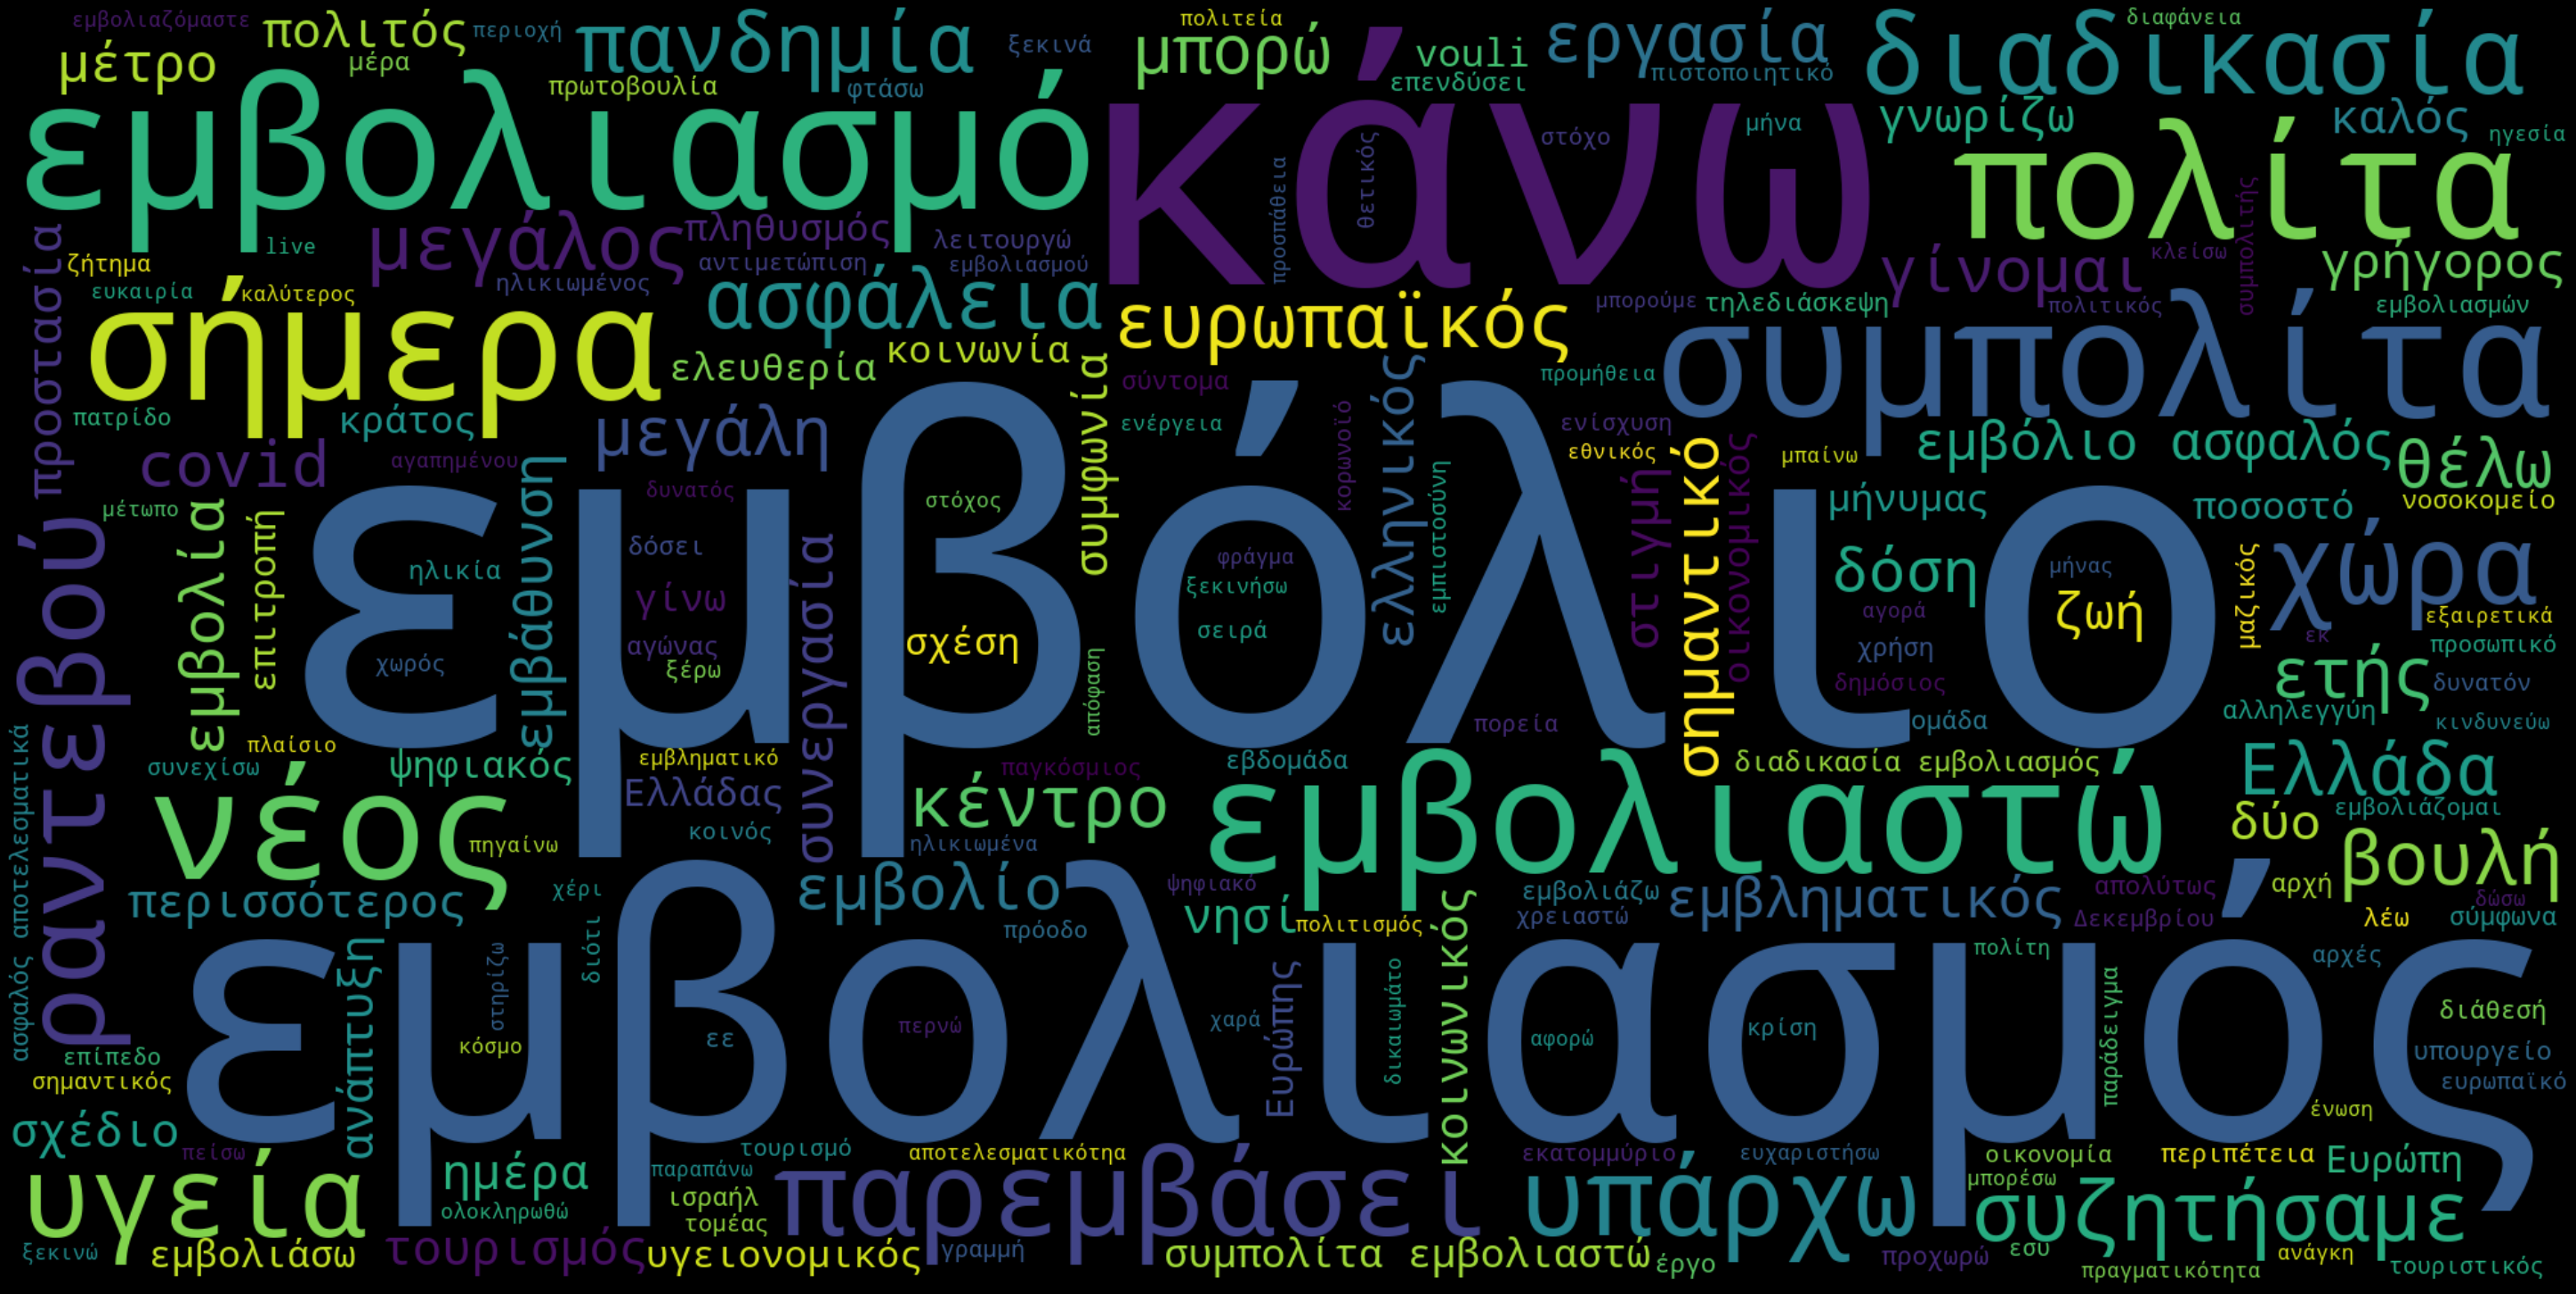

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Βρίσκω τις πιο συχνές λέξεις

Vectorization 


In [ ]:
text = short_tweets[short_tweets.text.str.contains('εμβ[α-ωά-ώ]*')] ['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
text = short_tweets[short_tweets.text.str.contains('εμβ[α-ωά-ώ]*')] ['text'] #.str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
count_vector = cv.fit_transform(text)


In [ ]:
count_vector.shape

(219, 2512)

In [ ]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


000  10  100  1000  1018  11  14  ...  ότι  όχι  ύψιστη  ύψος  ύψους  ώρα  ώστε
0    0   0    0     0     0   0   0  ...    0    0       0     0      0    0     0
1    0   0    0     0     0   0   0  ...    0    0       0     0      0    0     1
2    0   0    0     0     0   0   0  ...    0    0       0     0      0    0     0
3    0   0    0     0     0   0   0  ...    0    0       0     0      0    0     0
4    0   0    0     0     0   0   0  ...    0    0       0     0      0    0     0

[5 rows x 2512 columns]

In [ ]:
#cv.vocabulary_

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(text)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


000  10  19  2020  2021  25  ...  χώρα  χώρας  χώρες  ψηφιακή  ψηφιακό  ώρα
0    0   0   0     0     0   0  ...     0      0      1        0        0    0
1    0   0   0     0     0   0  ...     0      0      0        0        0    0
2    0   0   0     0     0   1  ...     0      0      0        0        0    0
3    0   0   0     0     0   0  ...     0      0      0        0        0    0
4    0   0   0     0     0   0  ...     0      0      0        0        0    0

[5 rows x 330 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(text)
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιή', 'ποιής', 'ποιώ', 'πολλός', 'προχθή', 'προχτά', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύτο', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2020  2021  30-39  covid  covid-19  ...  χωρός  χώρα  ψηφιακό  ψηφιακός  ώρα
0     0     0      0      0         0  ...      0     1        0         0    0
1     0     0      0      0         0  ...      0     0        0         0    0
2     0     0      0      0         0  ...      0     0        0         0    0
3     0     0      0      0         0  ...      0     0        0         0    0
4     0     0      0      0         0  ...      0     0        0         0    0

[5 rows x 333 columns]

In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(text)
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()




000  ασφάλεια  διαδικασία  ελλάδα  ...  σήμερα  συζητήσαμε  συμπολίτες  υγείας
0    0         0           0       0  ...       0           1           0       0
1    0         0           0       0  ...       0           0           1       0
2    0         0           0       0  ...       0           0           0       0
3    0         0           0       0  ...       0           0           0       0
4    0         0           0       0  ...       0           1           0       0

[5 rows x 20 columns]

In [ ]:
#cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bεμβ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
#count_vector = cv.fit_transform(short_tweets['text'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
#results.head()


Πιο συχνές μονές λέξεις

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(1, 1) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(text)
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000  ασφάλεια  διαδικασία  ελλάδα  ...  σήμερα  συζητήσαμε  συμπολίτες  υγείας
0    0         0           0       0  ...       0           1           0       0
1    0         0           0       0  ...       0           0           1       0
2    0         0           0       0  ...       0           0           0       0
3    0         0           0       0  ...       0           0           0       0
4    0         0           0       0  ...       0           1           0       0

[5 rows x 20 columns]

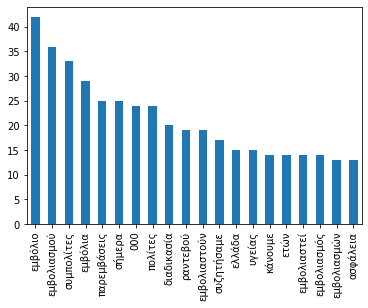

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='bar')

Πιο συχνές δυάδες λέξεων

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(text)
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 συμπολίτες  covid 19  ...  συντομότερο δυνατόν  τείχος ανοσίας
0               0         0  ...                    0               0
1               0         0  ...                    0               0
2               0         0  ...                    0               0
3               0         0  ...                    0               0
4               0         0  ...                    0               0

[5 rows x 20 columns]

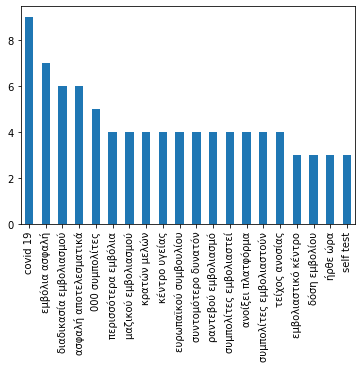

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='bar')

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


covid 19                  9
εμβόλια ασφαλή            7
διαδικασία εμβολιασμού    6
ασφαλή αποτελεσματικά     6
000 συμπολίτες            5
dtype: int64

ποια λέξη χρησιμοποιεί κυρίως για τον covid

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]*\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(text)
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

covid  covid-19  covid19
0      0         0        0
1      0         0        0
2      0         0        0
3      0         0        0
4      0         0        0

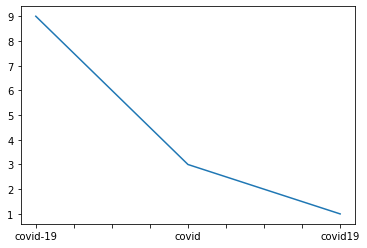

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot()

Cosine Similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(text)  #finds the tfidf score with normalization 


In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10   15        18   19  ...  ψηφιακή  ψηφιακού  ψηφιακό  όρο  ώρα
0  0.0  0.0  0.0  0.000000  0.0  ...      0.0       0.0      0.0  0.0  0.0
1  0.0  0.0  0.0  0.000000  0.0  ...      0.0       0.0      0.0  0.0  0.0
2  0.0  0.0  0.0  0.324534  0.0  ...      0.0       0.0      0.0  0.0  0.0
3  0.0  0.0  0.0  0.000000  0.0  ...      0.0       0.0      0.0  0.0  0.0
4  0.0  0.0  0.0  0.000000  0.0  ...      0.0       0.0      0.0  0.0  0.0

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.10654019 0.         0.         0.05653723 0.
  0.05336742 0.         0.1324588  0.         0.         0.19986109
  0.         0.         0.         0.         0.         0.
  0.         0.1160017  0.         0.         0.05811006 0.
  0.05605617 0.03988753 0.         0.05400618 0.03703294 0.
  0.05057665 0.13742637 0.         0.         0.06577487 0.
  0.         0.         0.         0.06991102 0.         0.
  0.         0.         0.         0.         0.         0.
  0.04099713 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.03995558 0.         0.         0.
  0.06954865 0.         0.0435208  0.         0.11774284 0.11519713
  0.08491057 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.10744703 0.         0.         0.
  0. 

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.10654019 0.         ... 0.         0.         0.06914168]
 [0.10654019 1.         0.05157347 ... 0.         0.         0.        ]
 [0.         0.05157347 1.         ... 0.         0.         0.11928602]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.06914168 0.         0.11928602 ... 0.         0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

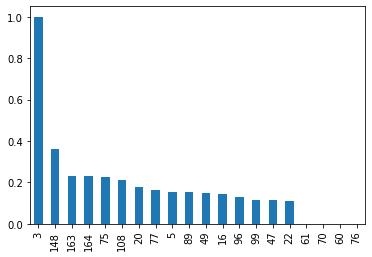

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_tweets['text'].loc[3]

'Όπως συζητήσαμε με τον @MathiasCormann, η παγκόσμια ανάκαμψη οφείλει να συνδυαστεί με τον περιορισμό των ανισοτήτων, την αύξηση της διεθνούς αλληλεγγύης με πρώτο στόχο τον παγκόσμιο εμβολιασμό, την τόνωση της εργασίας σε όλες τις χώρες και την αντιμετώπιση της κλιματικής αλλαγής.  '

In [ ]:
short_tweets['text'].loc[148]

'«Ημέρα κατά του Καπνίσματος» σημαίνει Ημέρα υπέρ της Ζωής. Ο νόμος που ψηφίσαμε και πολλοί αμφισβήτησαν αποτελεί, πλέον, πραγματικότητα. Και αποδείξαμε ότι ναι, μπορούμε να αλλάζουμε τις συνήθειες που βλάπτουν εμάς και τους γύρω μας. \n '